# 2.Data Preprocessing
After conducting data analysis, the next step is data preprocessing, which ensures the dataset is optimized for model training. First, images and masks will be resized to the average dimensions computed during analysis to standardize input sizes for the neural network, reducing computational overhead and ensuring uniformity across the dataset. Next, pixel values will be normalized to a range of 0 to 1 (or standardized), which improves model convergence by ensuring features are on a similar scale. Data augmentation techniques like rotation, flipping, and scaling will be applied to artificially increase dataset diversity, improving model generalization. For imbalanced datasets, techniques such as oversampling minority classes or applying class-weighted loss will be used to handle disparities in class representation. Finally, all data will be converted to tensors, as this format is required for PyTorch or TensorFlow models, enabling efficient processing and computation on GPUs. Each preprocessing step is essential to address specific dataset issues, enhance model performance, and prepare data for effective learning.

### 2.1 Resizing Images and Masks

In [ ]:
#train_image_path = "/content/drive/MyDrive/DUTS/DUTS-TR/DUTS-TR-Image"
#train_mask_path = "/content/drive/MyDrive/DUTS/DUTS-TR/DUTS-TR-Mask"

image_path = train_image_path
mask_path = train_mask_path

if not os.path.exists(image_path):
    print(f"Image file not found: {image_path}")
if not os.path.exists(mask_path):
    print(f"Mask file not found: {mask_path}")

train_images = sorted(os.listdir(image_path))
train_masks = sorted(os.listdir(mask_path))

train_resized_image_path = "/content/drive/MyDrive/DUST-RESIZED/DUTS-TR/DUTS-TR-Resized-Images"
train_resized_mask_path = "/content/drive/MyDrive/DUST-RESIZED/DUTS-TR/DUTS-TR-Resized-Masks"

os.makedirs(train_resized_image_path, exist_ok=True)
os.makedirs(train_resized_mask_path, exist_ok=True)

In [ ]:
timage_path = test_image_path
tmask_path = test_mask_path

if not os.path.exists(timage_path):
    print(f"Image file not found: {timage_path}")
if not os.path.exists(tmask_path):
    print(f"Mask file not found: {tmask_path}")

test_images = sorted(os.listdir(timage_path))
test_masks = sorted(os.listdir(tmask_path))

test_resized_image_path = "/content/drive/MyDrive/DUST-RESIZED/DUTS-TE/DUTS-TE-Resized-Images"
test_resized_mask_path = "/content/drive/MyDrive/DUST-RESIZED/DUTS-TE/DUTS-TE-Resized-Masks"

os.makedirs(test_resized_image_path, exist_ok=True)
os.makedirs(test_resized_mask_path, exist_ok=True)

In [ ]:
def resize_and_save_image(img_path, msk_path, target_size, image_save_path, mask_save_path):
    image = cv2.imread(img_path)
    mask = cv2.imread(msk_path, cv2.IMREAD_GRAYSCALE)

    if image is None or mask is None:
        raise ValueError(f"Failed to load image or mask: {img_path}, {msk_path}")

    image_resized = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    mask_resized = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)

    img_filename = os.path.basename(img_path)
    mask_filename = os.path.basename(msk_path)

    resized_img_path = os.path.join(image_save_path, img_filename)
    resized_mask_path = os.path.join(mask_save_path, mask_filename)

    cv2.imwrite(resized_img_path, image_resized)
    cv2.imwrite(resized_mask_path, mask_resized)

    return resized_img_path, resized_mask_path

In [ ]:
train_images_resized = []
train_masks_resized = []

print("Resizing and saving train images and masks...")
for img_file, mask_file in tqdm(zip(train_images, train_masks), total=len(train_images)):
    img_path = os.path.join(image_path, img_file)
    msk_path = os.path.join(mask_path, mask_file)

    try:
        resized_img_path, resized_mask_path = resize_and_save_image(
            img_path, msk_path, target_size=(372, 323),
            image_save_path=train_resized_image_path, mask_save_path=train_resized_mask_path
        )
        train_images_resized.append(resized_img_path)
        train_masks_resized.append(resized_mask_path)
    except Exception as e:
        print(f"Error resizing and saving: {e}")

print(f"Number of Train Images Resized and Saved: {len(train_images_resized)}")
print(f"Number of Train Masks Resized and Saved: {len(train_masks_resized)}")


Resizing and saving train images and masks...


100%|██████████| 10553/10553 [07:05<00:00, 24.79it/s]

Number of Train Images Resized and Saved: 10553
Number of Train Masks Resized and Saved: 10553


In [ ]:
test_images_resized = []
test_masks_resized = []

print("Resizing and saving test images and masks...")
for img_file, mask_file in tqdm(zip(test_images, test_masks), total=len(test_images)):
    img_path = os.path.join(timage_path, img_file)
    msk_path = os.path.join(tmask_path, mask_file)

    try:
        resized_img_path, resized_mask_path = resize_and_save_image(
            img_path, msk_path, target_size=(382, 321),
            image_save_path=test_resized_image_path, mask_save_path=test_resized_mask_path
        )
        test_images_resized.append(resized_img_path)
        test_masks_resized.append(resized_mask_path)
    except Exception as e:
        print(f"Error resizing and saving: {e}")

print(f"Number of Test Images Resized and Saved: {len(test_images_resized)}")
print(f"Number of Test Masks Resized and Saved: {len(test_masks_resized)}")


Resizing and saving test images and masks...


100%|██████████| 5019/5019 [03:20<00:00, 25.01it/s]

Number of Test Images Resized and Saved: 5019
Number of Test Masks Resized and Saved: 5019


### 2.2 Normalization

In [ ]:
nimage_path = "/content/drive/MyDrive/DUST-RESIZED/DUTS-TR/DUTS-TR-Resized-Images"
nmask_path = "/content/drive/MyDrive/DUST-RESIZED/DUTS-TR/DUTS-TR-Resized-Masks"

if not os.path.exists(nimage_path):
    print(f"Image file not found: {nimage_path}")
if not os.path.exists(nmask_path):
    print(f"Mask file not found: {nmask_path}")

ntrain_images = sorted(os.listdir(nimage_path))
ntrain_masks = sorted(os.listdir(nmask_path))
#train_images_resized
#train_masks_resized

In [ ]:
train_normalized_image_path = "/content/drive/MyDrive/DUST-NORMALIZED/DUTS-TR/DUTS-TR-Normalized-Images"
train_normalized_mask_path = "/content/drive/MyDrive/DUST-NORMALIZED/DUTS-TR/DUTS-TR-Normalized-Masks"

os.makedirs(train_normalized_image_path, exist_ok=True)
os.makedirs(train_normalized_mask_path, exist_ok=True)

train_images_normalized = []
train_masks_normalized = []

In [ ]:
tnimage_path = "/content/drive/MyDrive/DUST-RESIZED/DUTS-TE/DUTS-TE-Resized-Images"
tnmask_path = "/content/drive/MyDrive/DUST-RESIZED/DUTS-TE/DUTS-TE-Resized-Masks"
##
if not os.path.exists(tnimage_path):
    print(f"Image file not found: {tnimage_path}")
if not os.path.exists(tnmask_path):
    print(f"Mask file not found: {tnmask_path}")
##
ntest_images = sorted(os.listdir(tnimage_path))
ntest_masks = sorted(os.listdir(tnmask_path))
#test_images_resized
#test_masks_resized

In [ ]:
test_normalized_image_path = "/content/drive/MyDrive/DUST-NORMALIZED/DUTS-TE/DUTS-TE-Normalized-Images"
test_normalized_mask_path = "/content/drive/MyDrive/DUST-NORMALIZED/DUTS-TE/DUTS-TE-Normalized-Masks"

os.makedirs(test_normalized_image_path, exist_ok=True)
os.makedirs(test_normalized_mask_path, exist_ok=True)

test_images_normalized = []
test_masks_normalized = []

In [ ]:
def normalize_and_save_image(img_path, msk_path, image_save_path, mask_save_path):
    image = cv2.imread(img_path)
    mask = cv2.imread(msk_path, cv2.IMREAD_GRAYSCALE)

    if image is None or mask is None:
        raise ValueError(f"Failed to load image or mask: {img_path}, {msk_path}")

    image_normalized = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    mask_normalized = mask / 255.0

    img_filename = os.path.basename(img_path)
    mask_filename = os.path.basename(msk_path)

    normalized_img_path = os.path.join(image_save_path, img_filename)
    normalized_mask_path = os.path.join(mask_save_path, mask_filename)

    image_to_save = (image_normalized * 255).astype(np.uint8)
    mask_to_save = (mask_normalized * 255).astype(np.uint8)

    cv2.imwrite(normalized_img_path, image_to_save)
    cv2.imwrite(normalized_mask_path, mask_to_save)

    return normalized_img_path, normalized_mask_path

In [ ]:
print("Normalizing and saving train images and masks...")
for img_file, mask_file in tqdm(zip(ntrain_images, ntrain_masks), total=len(ntrain_images)):
    img_path = os.path.join(image_path, img_file)
    msk_path = os.path.join(mask_path, mask_file)

    try:
        normalized_img_path, normalized_mask_path = normalize_and_save_image(
            img_path, msk_path,
            image_save_path=train_normalized_image_path, mask_save_path=train_normalized_mask_path
        )
    except Exception as e:
        print(f"Error normalizing and saving: {e}")

Normalizing and saving train images and masks...


100%|██████████| 10553/10553 [07:14<00:00, 24.28it/s]


In [ ]:
# Normalize and save test images and masks
print("Normalizing and saving test images and masks...")
for img_file, mask_file in tqdm(zip(ntest_images, ntest_masks), total=len(ntest_images)):
    img_path = os.path.join(timage_path, img_file)
    msk_path = os.path.join(tmask_path, mask_file)

    try:
        normalized_img_path, normalized_mask_path = normalize_and_save_image(
            img_path, msk_path,
            image_save_path=test_normalized_image_path, mask_save_path=test_normalized_mask_path
        )
    except Exception as e:
        print(f"Error normalizing and saving: {e}")

print("Normalization completed.")

Normalizing and saving test images and masks...


100%|██████████| 5019/5019 [03:30<00:00, 23.90it/s]

Normalization completed.


### 2.3 Handling Class Imbalance
To check for class imbalance in a dataset, one can analyze the distribution of class labels by counting the occurrences of each class across the images. Class imbalance is determined by analyzing the masks because they contain the class labels for the foreground and background. The images themselves do not have labels, so they are not considered in the imbalance check. In the case of object saliency detection, this would involve checking the frequency of each pixel label, such as distinguishing between the salient object and the background. Imbalanced data can lead to biased model predictions, where the model favors the majority class, which typically results in poor performance for the minority class. This imbalance needs to be addressed during training to prevent the model from being evaluated based on this bias. Common techniques for handling imbalanced data include oversampling the minority class, undersampling the majority class, or assigning class weights to penalize the model more for misclassifying the minority class. Additionally, data augmentation can be employed to increase the representation of the minority class, making the model more robust and ensuring better generalization.

In [ ]:
def check_class_imbalance(masks):
    total_background = 0
    total_object = 0

    for mask in masks:
        #2.3.1 Flatten the Mask:
        mask_flat = mask.ravel()

        #2.3.2 Count the Unique Pixel Values
        pixel_counts = Counter(mask_flat)

        total_background += pixel_counts.get(0, 0)
        total_object += pixel_counts.get(1, 0)

    #2.3.3 Compute the Ratio
    total_pixels = total_background + total_object
    background_ratio = total_background / total_pixels
    object_ratio = total_object / total_pixels

    return background_ratio, object_ratio, total_background, total_object

In [ ]:
def load_images_from_path(image_path):
    image_files = sorted([os.path.join(image_path, file) for file in os.listdir(image_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
    images = [cv2.imread(img_file) for img_file in image_files]
    return images

In [ ]:
def check_class_imbalance_batch(masks_generator):
    total_background = 0
    total_object = 0

    for masks_batch in masks_generator:
        for mask in masks_batch:
            mask_flat = mask.flatten()
            total_background += np.sum(mask_flat == 0)
            total_object += np.sum(mask_flat > 0)

    total_pixels = total_background + total_object
    if total_pixels == 0:
        return 0, 0, total_background, total_object  # Avoid division by zero

    background_ratio = total_background / total_pixels
    object_ratio = total_object / total_pixels

    return background_ratio, object_ratio, total_background, total_object

In [ ]:
def load_images_in_batches(path, batch_size=100, grayscale=False):
    filenames = os.listdir(path)
    for i in range(0, len(filenames), batch_size):
        batch = filenames[i:i + batch_size]
        images = []
        for filename in batch:
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
            if img is None:
                print(f"Warning: Could not read image {img_path}")
                continue
            images.append(img)
        yield images

**Balanced Dataset:**

If the ratio between background and object pixels is approximately equal (e.g., 50-50), the dataset is balanced.

**Imbalanced Dataset:**

If the ratio between background and object pixels is skewed (e.g., 90-10), the dataset is imbalanced.

In [ ]:
batch_size = 100

train_masks_generator = load_images_in_batches(train_normalized_mask_path, batch_size=batch_size, grayscale=True)
test_masks_generator = load_images_in_batches(test_normalized_mask_path, batch_size=batch_size, grayscale=True)

background_ratio, object_ratio, total_background, total_object = check_class_imbalance_batch(train_masks_generator)
print(f"Training Data - Background Ratio: {background_ratio:.4f}, Object Ratio: {object_ratio:.4f}")
print(f"Total Background Pixels: {total_background}, Total Object Pixels: {total_object}")

background_ratio, object_ratio, total_background, total_object = check_class_imbalance_batch(test_masks_generator)
print(f"Testing Data - Background Ratio: {background_ratio:.4f}, Object Ratio: {object_ratio:.4f}")
print(f"Total Background Pixels: {total_background}, Total Object Pixels: {total_object}")

Training Data - Background Ratio: 0.7151, Object Ratio: 0.2849
Total Background Pixels: 889897942, Total Object Pixels: 354496458
Testing Data - Background Ratio: 0.8446, Object Ratio: 0.1554
Total Background Pixels: 514557195, Total Object Pixels: 94647605


### 2.4 Data Augmentation
Data augmentation is crucial when the dataset is small, to avoid overfitting, or when there is class imbalance. It is used to artificially expand the dataset and introduce variations such as different orientations, lighting, or scales, which the model may encounter in real-world scenarios. If the model performs well on training data but poorly on validation/test data, it indicates overfitting, and augmentation can help introduce variability. Augmentation should only be applied to the training data to prevent altering the unbiased evaluation of the model. Tools like Albumentations or TorchVision can be used to apply transformations such as flipping, rotating, or adjusting brightness to the images, ensuring that the model generalizes better on unseen data.

In [ ]:
%pip install torch torchvision torchaudio
!pip install -U albumentations
!pip show albumentations
!pip install albumentations==1.4.0

In [ ]:
import albumentations as A
import torch
from albumentations.core.composition import OneOf
from albumentations.core.transforms_interface import ImageOnlyTransform
from albumentations import HorizontalFlip, RandomBrightnessContrast, ShiftScaleRotate
from torchvision.transforms import ToTensor
import albumentations as A
from albumentations.pytorch import ToTensorV2
#from albumentations.pytorch import ToTensorV2
import numpy as np

augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
    ToTensorV2()
])

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


#### Check class imbalance

In [ ]:
def check_class_imbalance(masks):
    total_background = 0
    total_object = 0

    for mask in masks:
        if mask is None or mask.size == 0:
            print("Warning: Skipping empty or invalid mask.")
            continue
        total_background += np.sum(mask == 0)
        total_object += np.sum(mask > 0)

    total_pixels = total_background + total_object

    if total_pixels == 0:
        print("Warning: No valid pixels found in masks. Returning default ratios.")
        return 0.5, 0.5, total_background, total_object

    background_ratio = total_background / total_pixels
    object_ratio = total_object / total_pixels

    return background_ratio, object_ratio, total_background, total_object


#### Check if augmentation should be applied

In [ ]:
def should_apply_augmentation(images, masks):
    if len(images) < 500:
        return True

    background_ratio, object_ratio, _, _ = check_class_imbalance(masks)

    if background_ratio > 0.7:
        return True

    return False

In [ ]:
def load_images_in_batches(image_path, mask_path, batch_size=100):
    image_files = sorted(os.listdir(image_path))
    mask_files = sorted(os.listdir(mask_path))

    for i in range(0, len(image_files), batch_size):
        image_batch = [
            cv2.imread(os.path.join(image_path, file)) for file in image_files[i:i + batch_size]
        ]
        mask_batch = [
            cv2.imread(os.path.join(mask_path, file), cv2.IMREAD_GRAYSCALE) for file in mask_files[i:i + batch_size]
        ]
        yield image_batch, mask_batch

##### Save Augmented data

In [ ]:
train_augmented_image_path = "/content/drive/MyDrive/DUST-AUGMENTED/DUTS-TR/DUTS-TR-Augmented-Images"
train_augmented_mask_path = "/content/drive/MyDrive/DUST-AUGMENTED/DUTS-TR/DUTS-TR-Augmented-Masks"

os.makedirs(train_augmented_image_path, exist_ok=True)
os.makedirs(train_augmented_mask_path, exist_ok=True)

TRaugmented_images = []
TRaugmented_masks = []
image_count = 0

In [ ]:
if should_apply_augmentation(train_normalized_image_path, train_normalized_mask_path):
    print("Applying augmentation...")

    for image_batch, mask_batch in load_images_in_batches(train_normalized_image_path, train_normalized_mask_path, batch_size=100):
        for img, mask in zip(image_batch, mask_batch):
            if img is None or mask is None:
                print("Skipping null image/mask.")
                continue

            # Apply augmentation
            augmented = augmentation_pipeline(image=img, mask=mask)
            TRaugmented_image = augmented['image']
            TRaugmented_mask = augmented['mask']

            # Convert to NumPy arrays (if tensors)
            if isinstance(TRaugmented_image, torch.Tensor):
                TRaugmented_image = TRaugmented_image.permute(1, 2, 0).cpu().numpy()
            if isinstance(TRaugmented_mask, torch.Tensor):
                TRaugmented_mask = TRaugmented_mask.cpu().numpy()

            # Convert to PIL.Image format
            if len(TRaugmented_image.shape) == 2:  # If grayscale, add a color dimension
                TRaugmented_image = cv2.cvtColor(TRaugmented_image, cv2.COLOR_GRAY2RGB)
            augmented_image_pil = Image.fromarray(np.uint8(TRaugmented_image))

            if len(TRaugmented_mask.shape) == 3 and TRaugmented_mask.shape[2] == 3:
                TRaugmented_mask = cv2.cvtColor(TRaugmented_mask, cv2.COLOR_BGR2GRAY)
            augmented_mask_pil = Image.fromarray(np.uint8(TRaugmented_mask))

            # Save augmented images and masks using PIL
            img_filename = os.path.join(train_augmented_image_path, f"aug_img_{image_count:04d}.png")
            mask_filename = os.path.join(train_augmented_mask_path, f"aug_mask_{image_count:04d}.png")

            augmented_image_pil.save(img_filename, format="PNG")
            augmented_mask_pil.save(mask_filename, format="PNG")

            image_count += 1

    print(f"Saved {image_count} augmented images and masks.")
else:
    print("No augmentation applied.")

Applying augmentation...


In [ ]:
test_augmented_image_path = "/content/drive/MyDrive/DUST-AUGMENTED/DUTS-TE/DUTS-TE-Augmented-Images"
test_augmented_mask_path = "/content/drive/MyDrive/DUST-AUGMENTED/DUTS-TE/DUTS-TE-Augmented-Masks"

os.makedirs(test_augmented_image_path, exist_ok=True)
os.makedirs(test_augmented_mask_path, exist_ok=True)

TEaugmented_images = []
TEaugmented_masks = []
image_count = 0

In [ ]:
if should_apply_augmentation(test_normalized_image_path, test_normalized_mask_path):
    print("Applying augmentation...")

    for image_batch, mask_batch in load_images_in_batches(test_normalized_image_path, test_normalized_mask_path, batch_size=100):
        for img, mask in zip(image_batch, mask_batch):
            if img is None or mask is None:
                print("Skipping null image/mask.")
                continue

            # Apply augmentation
            augmented = augmentation_pipeline(image=img, mask=mask)
            TEaugmented_image = augmented['image']
            TEaugmented_mask = augmented['mask']

            # Convert to NumPy arrays (if tensors)
            if isinstance(TEaugmented_image, torch.Tensor):
                TEaugmented_image = TEaugmented_image.permute(1, 2, 0).cpu().numpy()
            if isinstance(TEaugmented_mask, torch.Tensor):
                TEaugmented_mask = TEaugmented_mask.cpu().numpy()

            # Convert to PIL.Image format
            if len(TEaugmented_image.shape) == 2:  # If grayscale, add a color dimension
                TEaugmented_image = cv2.cvtColor(TEaugmented_image, cv2.COLOR_GRAY2RGB)
            taugmented_image_pil = Image.fromarray(np.uint8(TEaugmented_image))

            if len(TEaugmented_mask.shape) == 3 and TEaugmented_mask.shape[2] == 3:
                TEaugmented_mask = cv2.cvtColor(TEaugmented_mask, cv2.COLOR_BGR2GRAY)
            taugmented_mask_pil = Image.fromarray(np.uint8(TEaugmented_mask))

            # Save augmented images and masks using PIL
            img_filename = os.path.join(test_augmented_image_path, f"aug_img_{image_count:04d}.png")
            mask_filename = os.path.join(test_augmented_mask_path, f"aug_mask_{image_count:04d}.png")

            taugmented_image_pil.save(img_filename, format="PNG")
            taugmented_mask_pil.save(mask_filename, format="PNG")

            image_count += 1

    print(f"Saved {image_count} augmented images and masks.")
else:
    print("No augmentation applied.")

Applying augmentation...
Saved 5019 augmented images and masks.


In [ ]:
def verify_directories(image_path, mask_path):
    if not os.path.exists(image_path) or not os.listdir(image_path):
        raise ValueError(f"No images found in {image_path}")
    if not os.path.exists(mask_path) or not os.listdir(mask_path):
        raise ValueError(f"No masks found in {mask_path}")

verify_directories(train_normalized_image_path, train_normalized_mask_path)
verify_directories(test_normalized_image_path, test_normalized_mask_path)

In [ ]:
def load_image(image_path):
    return cv2.imread(image_path)

image_files = os.listdir(train_normalized_image_path)
mask_files = os.listdir(train_normalized_mask_path)

sample_image = load_image(os.path.join(train_normalized_image_path, image_files[0]))
sample_mask = load_image(os.path.join(train_normalized_mask_path, mask_files[0]))


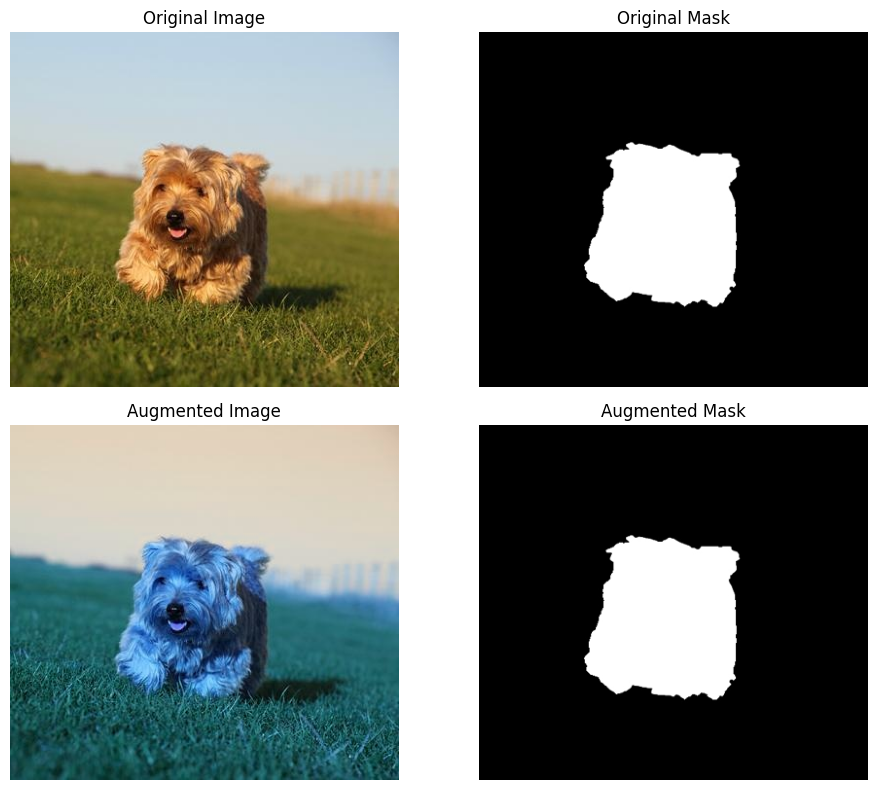

In [ ]:

# Ensure mask is grayscale
sample_mask = cv2.cvtColor(sample_mask, cv2.COLOR_BGR2GRAY)

augmented = augmentation_pipeline(image=sample_image, mask=sample_mask)
augmented_image = augmented['image']
augmented_mask = augmented['mask']

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(sample_mask, cmap='gray')
plt.title("Original Mask")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(augmented_image.permute(1, 2, 0).numpy())  # Convert tensor to NumPy
plt.title("Augmented Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(augmented_mask.numpy(), cmap='gray')
plt.title("Augmented Mask")
plt.axis("off")

plt.tight_layout()
plt.show()

###  2.5 Converting Data to Tensors (for Deep Learning Models)

In [ ]:
def load_images_and_convert_to_tensor_in_batches(image_path, mask_path, batch_size=10, transform=None, resize_shape=(256, 256)):
    image_files = sorted(os.listdir(image_path))
    mask_files = sorted(os.listdir(mask_path))

    total_images = len(image_files)
    for start_idx in range(0, total_images, batch_size):
        end_idx = min(start_idx + batch_size, total_images)

        images = []
        masks = []

        for img_file, mask_file in zip(image_files[start_idx:end_idx], mask_files[start_idx:end_idx]):
            img_filepath = os.path.join(image_path, img_file)
            mask_filepath = os.path.join(mask_path, mask_file)

            img = Image.open(img_filepath).convert('RGB')  # Ensure 3-channel RGB format
            mask = Image.open(mask_filepath).convert('L')  # Ensure grayscale format

            img = img.resize(resize_shape)
            mask = mask.resize(resize_shape, Image.NEAREST)  # Use nearest neighbor for mask resizing

            img_array = np.array(img)
            mask_array = np.array(mask)

            if transform:
                augmented = transform(image=img_array, mask=mask_array)
                img_array = augmented['image']
                mask_array = augmented['mask']

            # Convert to tensor
            img_tensor = torch.tensor(img_array).permute(2, 0, 1).float() / 255.0  # Normalize image to [0, 1]
            mask_tensor = torch.tensor(mask_array).unsqueeze(0).float() / 255.0  # For segmentation tasks

            images.append(img_tensor)
            masks.append(mask_tensor)

        images_tensor = torch.stack(images)
        masks_tensor = torch.stack(masks)

        yield images_tensor, masks_tensor

In [ ]:
train_augmented_image_path = "/content/drive/MyDrive/DUST-AUGMENTED/DUTS-TR/DUTS-TR-Augmented-Images"
train_augmented_mask_path = "/content/drive/MyDrive/DUST-AUGMENTED/DUTS-TR/DUTS-TR-Augmented-Masks"

test_augmented_image_path = "/content/drive/MyDrive/DUST-AUGMENTED/DUTS-TE/DUTS-TE-Augmented-Images"
test_augmented_mask_path = "/content/drive/MyDrive/DUST-AUGMENTED/DUTS-TE/DUTS-TE-Augmented-Masks"

batch_size = 100


In [ ]:
for train_images_tensor_batch, train_masks_tensor_batch in load_images_and_convert_to_tensor_in_batches(train_augmented_image_path, train_augmented_mask_path, batch_size=batch_size, resize_shape=(372, 323)):
    print(f"Loaded batch of {train_images_tensor_batch.shape[0]} augmented train images and masks.")


Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmented train images and masks.
Loaded batch of 100 augmente

In [ ]:
for test_images_tensor_batch, test_masks_tensor_batch in load_images_and_convert_to_tensor_in_batches(test_augmented_image_path, test_augmented_mask_path, batch_size=batch_size, resize_shape=(382 , 321)):
    print("*")
    print(f"Loaded batch of {test_images_tensor_batch.shape[0]} augmented test images and masks.")

In [ ]:
train_augmented_images = os.listdir(train_augmented_image_path)
train_augmented_masks = os.listdir(train_augmented_mask_path)

print(f"Number of Test images: {len(train_augmented_images)}")
print(f"Number of Test masks: {len(train_augmented_masks)}")

not_missing_masks = [img for img in train_augmented_images if img in train_augmented_masks]
if not_missing_masks:
    print(f"Missing masks for {len(not_missing_masks)} images.")
else:
    print("All train augmented images have corresponding masks.")

Number of Test images: 10553
Number of Test masks: 10553
All train augmented images have corresponding masks.


In [ ]:
test_augmented_images = os.listdir(test_augmented_image_path)
test_augmented_masks = os.listdir(test_augmented_mask_path)

print(f"Number of Test images: {len(test_augmented_images)}")
print(f"Number of Test masks: {len(test_augmented_masks)}")

not_missing_masks = [img for img in test_augmented_images if img in test_augmented_masks]
if not_missing_masks:
    print(f"Missing masks for {len(not_missing_masks)} images.")
else:
    print("All test augmented images have corresponding masks.")

Number of Test images: 5019
Number of Test masks: 5019
All test augmented images have corresponding masks.
